In [1]:
library(ggplot2)
library(reshape)
library(plyr)
library(gridExtra)
library(grid)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any



In [3]:
old_layout <- read.csv('old_layout.csv', header=F, sep="\t")
old_layout <- old_layout$V1
new_layout <- read.csv('new_layout.csv', header=F, sep="\t")
new_layout <- new_layout$V1
ds <- as.data.frame(cbind(old_layout[1:100], new_layout[1:100]))
colnames(ds) <- c('old_layout', 'new_layout')

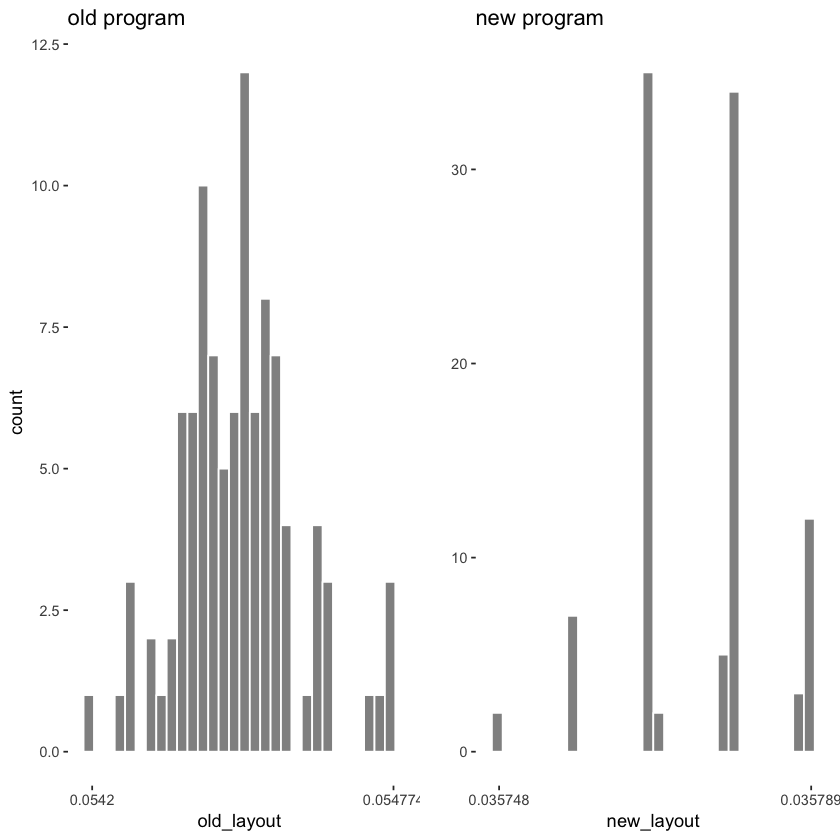

In [122]:
p1 <- ggplot(ds, aes(x=old_layout)) +
      geom_histogram(bins=30,
                     col="white", 
                     fill="black", 
                     alpha = .5) +
      theme(panel.background = element_rect(fill = "white", colour = "white")) +
      #scale_y_continuous(limits = c(0, 100)) +
      scale_x_continuous(breaks = c(min(ds$old_layout),max(ds$old_layout)), 
                         labels = c(min(ds$old_layout),max(ds$old_layout))) +
      labs(title="old program")
p2 <- ggplot(ds, aes(x=new_layout)) +
      geom_histogram(bins=30,
                     col="white", 
                     fill="black", 
                     alpha = .5) +
      theme(panel.background = element_rect(fill = "white", colour = "white")) +
      #scale_y_continuous(limits = c(0, 100)) +
      labs(title="new program") +
      scale_x_continuous(breaks = c(min(ds$new_layout),max(ds$new_layout)), 
                         labels = c(min(ds$new_layout),max(ds$new_layout))) +
      ylab("")
grid.arrange(p1, p2, ncol = 2)

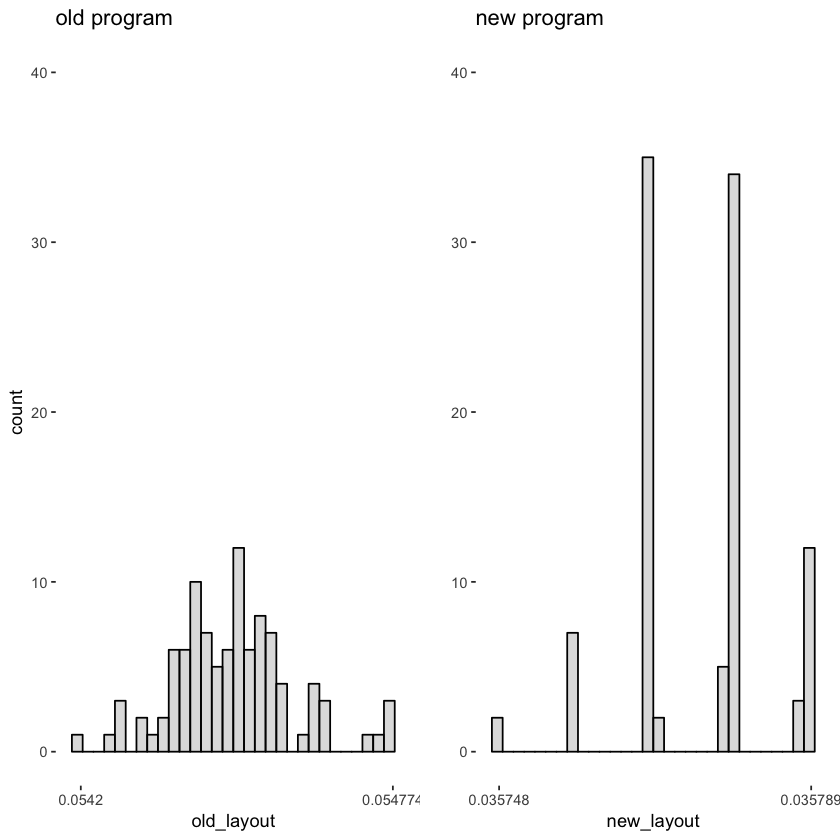

In [124]:
p1 <- ggplot(ds, aes(x=old_layout)) +
      geom_histogram(bins=30,
                     col="black", 
                     fill="gray", 
                     alpha = .5) +
      theme(panel.background = element_rect(fill = "white", colour = "white")) +
      scale_y_continuous(limits = c(0, 40)) +
      scale_x_continuous(breaks = c(min(ds$old_layout),max(ds$old_layout)), 
                         labels = c(min(ds$old_layout),max(ds$old_layout))) +
      labs(title="old program")
p2 <- ggplot(ds, aes(x=new_layout)) +
      geom_histogram(bins=30,
                     col="black", 
                     fill="gray", 
                     alpha = .5) +
      theme(panel.background = element_rect(fill = "white", colour = "white")) +
      scale_y_continuous(limits = c(0, 40)) +
      labs(title="new program") +
      scale_x_continuous(breaks = c(min(ds$new_layout),max(ds$new_layout)), 
                         labels = c(min(ds$new_layout),max(ds$new_layout))) +
      ylab("")
grid.arrange(p1, p2, ncol = 2)

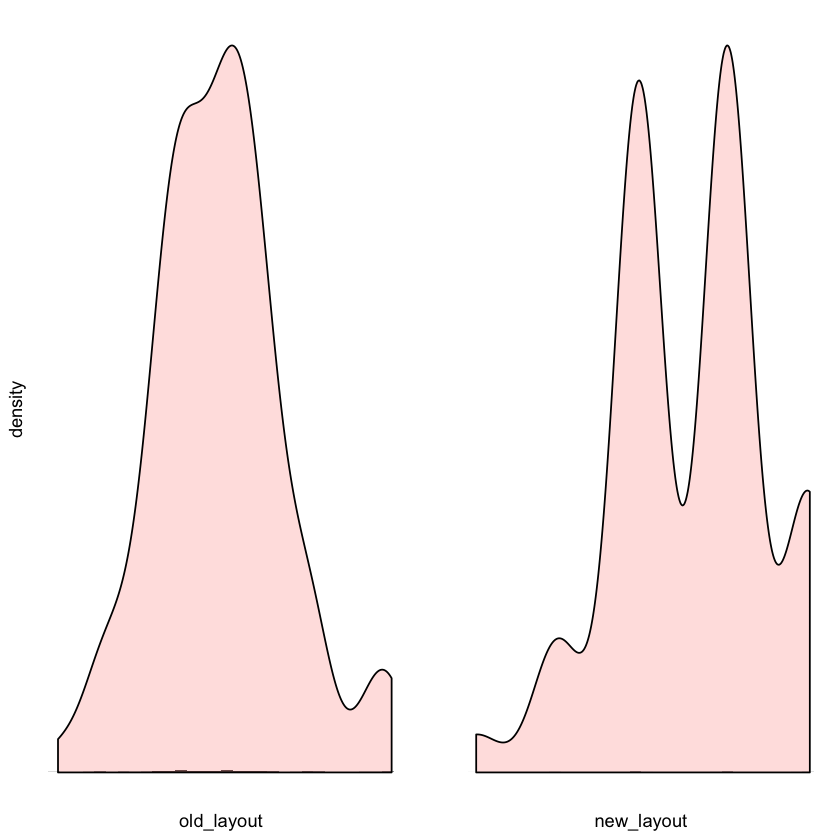

In [118]:
p3 <- ggplot(ds, aes(x = old_layout)) +
      geom_histogram(bins = 30) +
      theme(panel.background = element_rect(fill = "white", colour = "white"))  +
      geom_density(alpha = .2, fill="#FF6655") +
      scale_y_continuous(breaks = NULL)+
      scale_x_continuous(breaks = NULL) +
      ylab("density")
p4 <- ggplot(ds, aes(x = new_layout)) +
      geom_histogram(bins = 30) +
      theme(panel.background = element_rect(fill = "white", colour = "white")) +
      geom_density(alpha = .2, fill="#FF6655")+
      scale_y_continuous(breaks = NULL)+
      scale_x_continuous(breaks = NULL) +
      ylab("")
grid.arrange(p3, p4, ncol = 2)

Using  as id variables


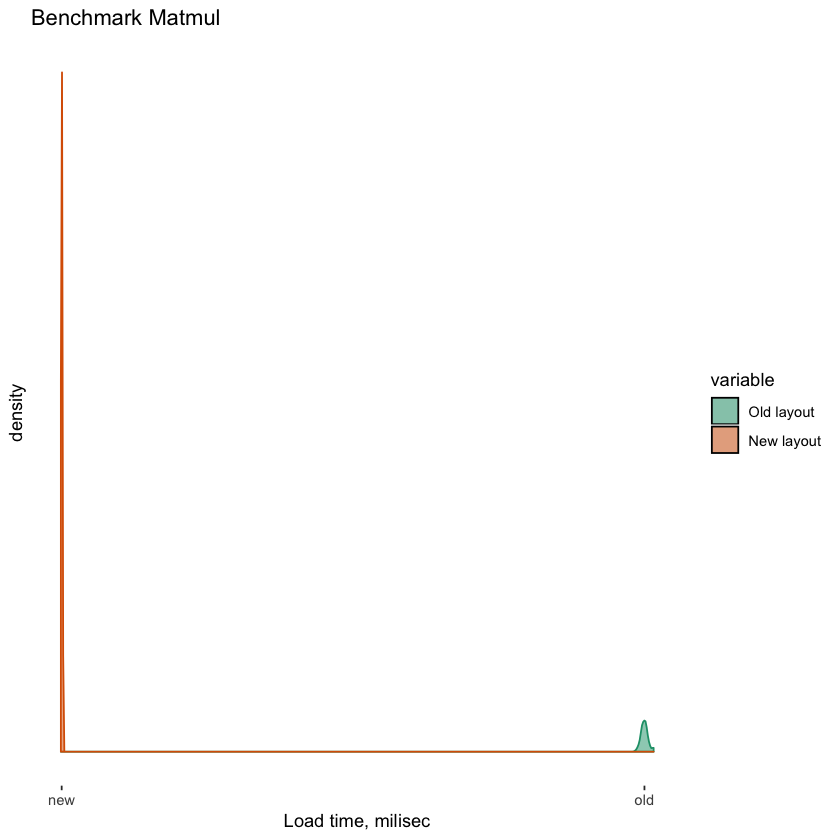

In [120]:
ds.melt <- melt(ds)
cdat <- ddply(ds.melt, "variable", summarise, rating.mean=mean(value))
p <- ggplot(ds.melt, aes(x=value, fill=variable, color=variable)) +
     geom_density(alpha=.5) +
     ggtitle("Benchmark Matmul") +
     guides(fill = guide_legend(override.aes = list(colour = NULL))) +
     scale_fill_brewer(palette="Dark2", labels=c("Old layout", "New layout")) +
     scale_color_brewer(palette="Dark2",guide=FALSE) + 
     xlab("Load time, milisec")+
     theme(panel.background = element_rect(fill = "white", colour = "white")) +
     scale_y_continuous(breaks = NULL) +
     scale_x_continuous(breaks = c(mean(ds$new_layout),mean(ds$old_layout)), labels = c("new","old"))

print(p)